## Домашнее задание к занятию 6: "Градиентный бустинг (AdaBoost)"

Задание: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state = 14)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_tree, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    train_error = []
    test_error = []
    
    for i in range(n_tree):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
        trees.append(tree)
    train_error.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
    test_error.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        
    return trees, train_error, test_error

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta, n_trees, max_depth):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [10]:
def get_error_plot(param_tree, train_err, test_err, label_name, title_name):
    plt.xlabel(label_name)
    plt.ylabel('MSE')
    plt.plot(param_tree, train_err, label='train error')
    plt.plot(param_tree, test_err, label='test error')
    plt.legend()
    plt.title(title_name)
    plt.show()

Ошибка алгоритма из 1 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2768.7492096068513
Ошибка алгоритма из 1 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4399.800905879812

Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1543.841955925807
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4096.778995924574

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1048.817169775994
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4343.249701301274

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 537.8585385841285
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5094.6639011818015

Ошибка алгоритма из 40 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 103.45725314340615
Ошибка алгоритма из 40 деревьев глубиной 3     с шагом 1 на тестовой выборке: 5862.1364674963115

Ошибка алг

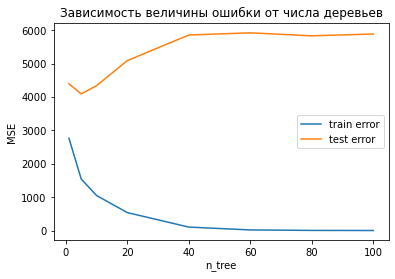

In [11]:
# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

train_errors_for_tree = []
test_errors_for_tree = []

list_count_trees = [1, 5, 10, 20, 40, 60, 80, 100]

for n_tree in list_count_trees:
    coefs = [1] * n_tree
    tree, train_errors, test_errors = gb_fit(n_tree, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_errors_for_tree.append(train_errors)
    test_errors_for_tree.append(test_errors)
    evaluate_alg(X_train, X_test, y_train, y_test, tree, coefs, eta, n_tree, max_depth)
    print()
    
get_error_plot(list_count_trees, train_errors_for_tree, test_errors_for_tree, 
               'n_tree', 'Зависимость величины ошибки от числа деревьев')

Можно заметить, что при количестве деревьев более 25 ошибка на тесте только увеличивается, поэтому рассмотрим ошибку для количества деревьев до 25

Ошибка алгоритма из 1 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2768.7492096068513
Ошибка алгоритма из 1 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4399.800905879812

Ошибка алгоритма из 2 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2272.758488852521
Ошибка алгоритма из 2 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4272.788227870812

Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1932.812275945241
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4068.91304210222

Ошибка алгоритма из 4 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1774.935910743925
Ошибка алгоритма из 4 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4026.735009710544

Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1543.841955925807
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4096.778995924574

Ошибка алгоритма из 

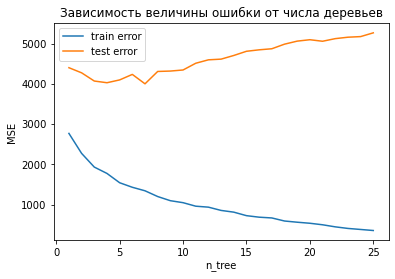

In [12]:
train_errors_for_tree = []
test_errors_for_tree = []

list_count_trees = range(1, 26)

for n_tree in list_count_trees:
    coefs = [1] * n_tree
    tree, train_errors, test_errors = gb_fit(n_tree, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_errors_for_tree.append(train_errors)
    test_errors_for_tree.append(test_errors)
    evaluate_alg(X_train, X_test, y_train, y_test, tree, coefs, eta, n_tree, max_depth)
    print()
    
get_error_plot(list_count_trees, train_errors_for_tree, test_errors_for_tree, 
               'n_tree', 'Зависимость величины ошибки от числа деревьев')

In [13]:
min(test_errors_for_tree)

[3999.6076898377432]

Для исходных данных и выбранных параметров наименьшую ошибку даёт количество деревьев, равное 7. 

Ошибка алгоритма из 7 деревьев глубиной 1     с шагом 1 на тренировочной выборке: 2810.879898187519
Ошибка алгоритма из 7 деревьев глубиной 1     с шагом 1 на тестовой выборке: 3567.5192558699223

Ошибка алгоритма из 7 деревьев глубиной 2     с шагом 1 на тренировочной выборке: 2218.2739823726765
Ошибка алгоритма из 7 деревьев глубиной 2     с шагом 1 на тестовой выборке: 3858.614175903021

Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1343.960477855744
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 1 на тестовой выборке: 3999.6076898377432

Ошибка алгоритма из 7 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 673.3812757378953
Ошибка алгоритма из 7 деревьев глубиной 4     с шагом 1 на тестовой выборке: 4792.688945514065

Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 218.27141098193073
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 1 на тестовой выборке: 7557.375054687584

Ошибка алгоритма

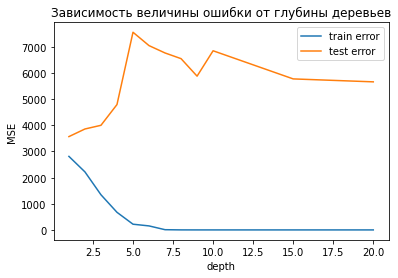

In [14]:
# Число деревьев в ансамбле
n_trees = 7

# Шаг
eta = 1

coefs = [1] * n_trees

train_errors_for_depth = []
test_errors_for_depth = []

list_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]

for depth in list_depth:
    tree, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_errors_for_depth.append(train_errors)
    test_errors_for_depth.append(test_errors)
    evaluate_alg(X_train, X_test, y_train, y_test, tree, coefs, eta, n_trees, depth)
    print()
    
get_error_plot(list_depth, train_errors_for_depth, test_errors_for_depth, 
               'depth', 'Зависимость величины ошибки от глубины деревьев')

In [15]:
min(test_errors_for_depth)

[3567.5192558699223]

Для исходных данных и выбранных параметров наименьшую ошибку даёт глубина деревьев, равная 1.

Выводы:
1. Наименьшая ошибка получена при глубине 1 и количестве деревьев 7. 
2. При увеличении количества деревьев ошибка падает на малом количестве деревьев, но при большом количестве деревьев ошибка уже не уменьшается, только увеличивается
3. При увеличении глубины деревьев ошибка только увеличивается, поэтому рекомендуемое значение глубины для данного набора данных - 1.